In [17]:
import qimax.utilities
import qimax.tensor
import qimax.gate
import qimax.converter
import numpy as np, qiskit, re

In [ ]:
import qiskit.quantum_info as qi
import qimax.constant
from qoop.core.random_circuit import generate_with_pool
from qoop.core.gradient import grad_loss
%load_ext autoreload
%autoreload 2
num_qubits = 20
qc = generate_with_pool(num_qubits, 10)
qc = qc.assign_parameters([1] * qc.num_parameters)
qc.draw('mpl')
# grad_loss1 = grad_loss(qc, [1] * qc.num_parameters)
# print(grad_loss1)

In [ ]:
from qiskit.providers.basicaer import QasmSimulatorPy
backend = QasmSimulatorPy()
qc_basis = qiskit.transpile(qc, backend, optimization_level = 1,
    basis_gates=['h', 'cx',
                'rx','ry','rz',
                'crx','cry','crz'])
qc_basis.draw('mpl')

In [29]:
import time
import qimax.gradient
num_qubits = list(range(2, 8))

depths = list(range(2, 5))
time_psr = np.zeros((len(num_qubits), len(depths)))
time_proposed_psr = np.zeros((len(num_qubits), len(depths)))
time_qiskit = np.zeros((len(num_qubits), len(depths)))
for i, num_qubit in enumerate(num_qubits):
    for j, depth in enumerate(depths):
            time_psrs, time_proposed_psrs, time_qiskits = [], [], []
            for k in range(5):
                qc = generate_with_pool(num_qubit, depth)
                start = time.time()
                result1 = qimax.gradient.psr(qc)
                end = time.time()
                time_psrs.append(end - start)
                start = time.time()
                result1 = qimax.gradient.proposed_psr(qc)
                end = time.time()
                time_proposed_psrs.append(end - start)
                start = time.time()
                result1 = qimax.gradient.qiskit(qc)
                end = time.time()
                time_qiskits.append(end - start)
            time_psr[i, j] = np.mean(time_psrs)
            time_proposed_psr[i, j] = np.mean(time_proposed_psrs)
            time_qiskit[i, j] = np.mean(time_qiskits)
np.savetxt(f"result/time_psr.csv", time_psr, delimiter=",")
np.savetxt(f"result/time_proposed_psr.csv", time_proposed_psr, delimiter=",")
np.savetxt(f"result/time_qiskit.csv", time_qiskit, delimiter=",")


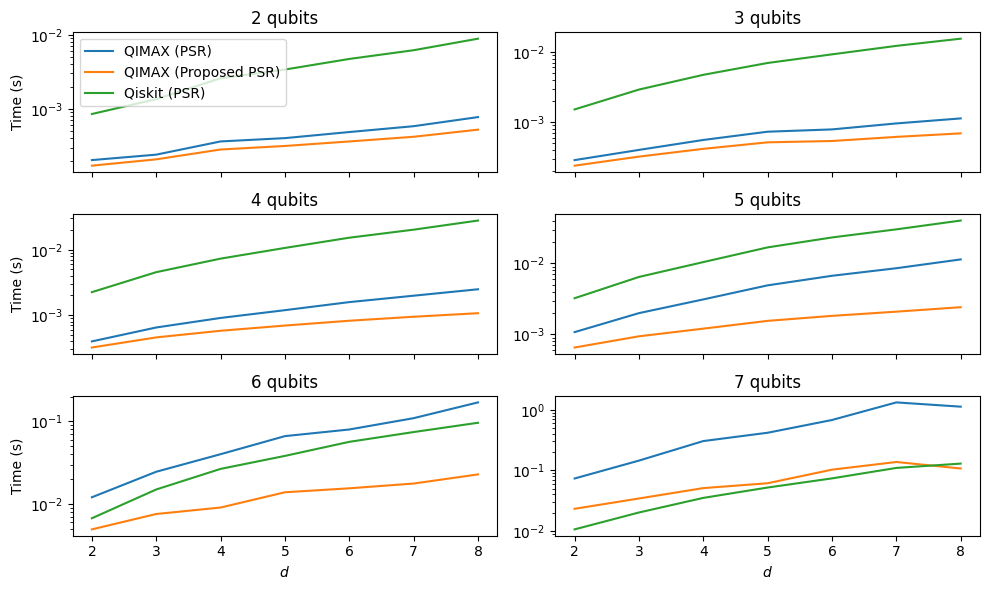

In [169]:
import matplotlib.pyplot as plt

depth = 5
num_qubit = 6
fig, axs = plt.subplots(3, 2, figsize = (10, 6))
j = 0
for i in range(2,8):
    x = j // 2
    y = j % 2
    axs[x,y].plot(range(2, 9), time_psr[i - 2][:], label = 'QIMAX (PSR)')
    axs[x,y].plot(range(2, 9),time_proposed_psr[i - 2][:], label = 'QIMAX (Proposed PSR)')
    axs[x,y].plot(range(2, 9), time_qiskit[i - 2][:], label = 'Qiskit (PSR)')
    
    if y == 0:
        axs[x,y].set_ylabel('Time (s)')
    else:
        axs[x,y].set_yticklabels([])
    axs[x,y].set_xticks(range(2, 9))
    if x == 2:
        axs[x,y].set_xlabel('$d$')
    else:
        axs[x,y].set_xticklabels([])
    axs[x,y].set_yscale('log')
    
    axs[x,y].set_title(f'{i} qubits')
    
    j += 1
# set position of legend
axs[0,0].legend(loc='upper left')
plt.tight_layout()